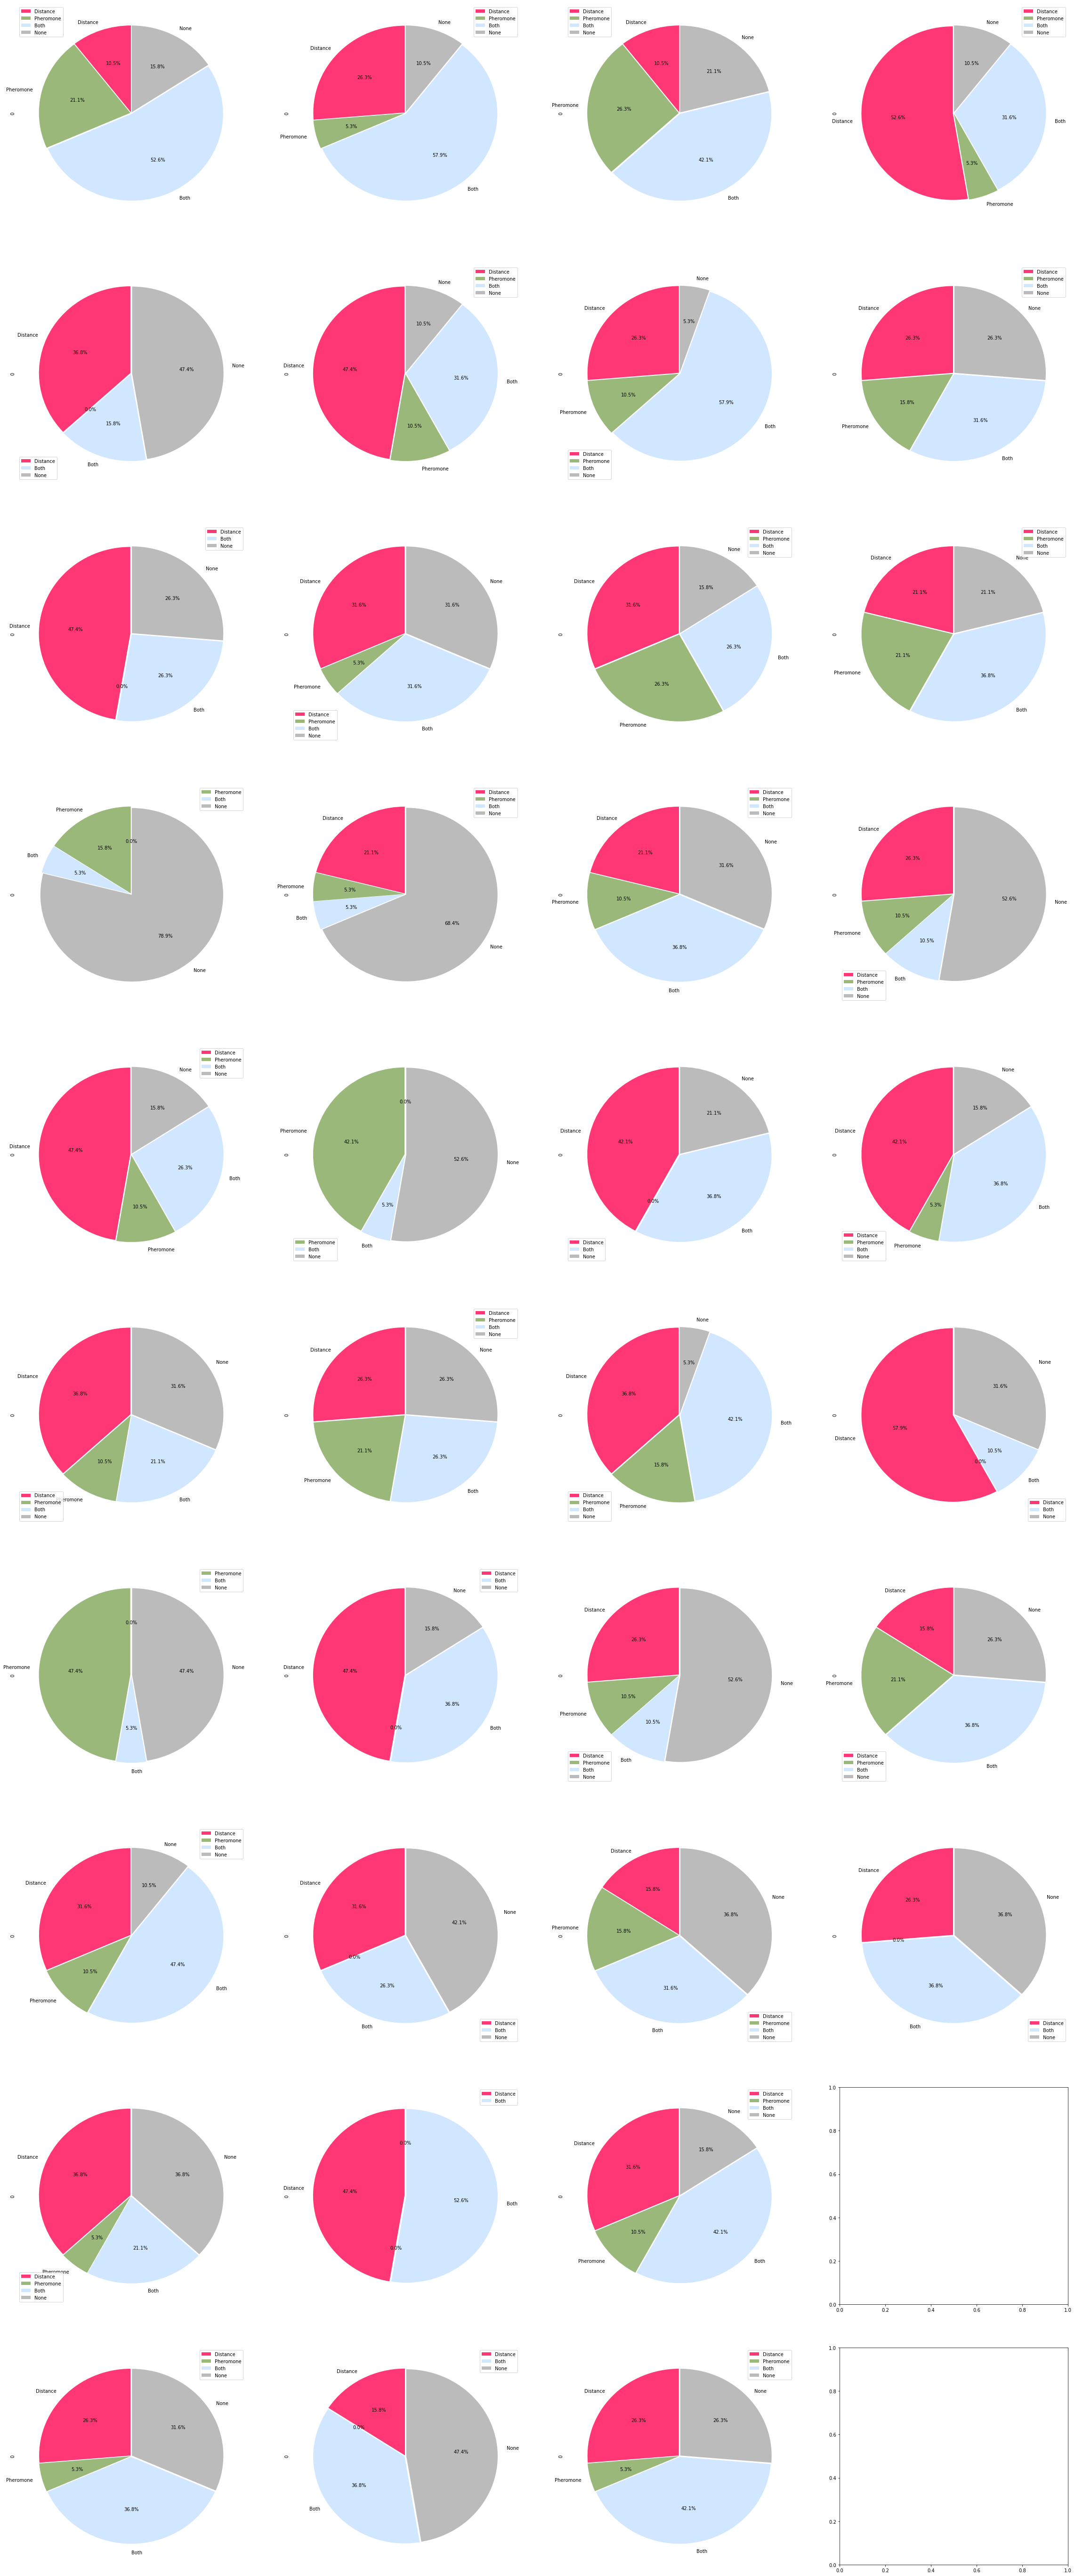

In [85]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pprint import pprint

DISTANCE = 0
PHEROMONE = 1
BOTH = 2
NONE = 3

berlin_distance = json.load(open('berlin52-distance.json'))
data1 = json.load(open('berlin52_2018-04-13T09_21_17.705Z.json'))
data2 = json.load(open('berlin52_2018-04-18T20_36_44.966Z.json'))
data = data1 + data2
data = [x['path'] for x in data]
data = [x for x in data if len(x) == 19]

def get_distance(x1, x2, y1, y2):
    return math.sqrt(pow((x1 - x2), 2) + pow((y1 - y2), 2))

def get_nodes_distance(a, b):
    # indexes are from 1, not 0
    node_a = berlin_distance[a-1]
    node_b = berlin_distance[b-1]
    return get_distance(node_a['x'], node_b['x'], node_a['y'], node_b['y'])

dataframe_array = []
for run in data:
    run_array = []
    for node in run:
        current_node_id = node['currentNodeId']
        chosen_node_id = node['chosenNodeId']
        neighbours = node['neighbours']
        
        for neighbour in neighbours:
            neighbour_node_id = neighbour['nodeId']
            neighbour['distance'] = get_nodes_distance(current_node_id, neighbour_node_id)
        
        highest_pheromone_id = max(neighbours, key=lambda x: x['pheromone'])['nodeId']
        lowest_distance_id = min(neighbours, key=lambda x: x['distance'])['nodeId']
        
        node['highestPheromoneId'] = highest_pheromone_id
        node['lowestDistanceId'] = lowest_distance_id
        
        if lowest_distance_id == highest_pheromone_id == chosen_node_id:
            run_array.append(BOTH)
        elif lowest_distance_id == chosen_node_id:
            run_array.append(DISTANCE)
        elif highest_pheromone_id == chosen_node_id:
            run_array.append(PHEROMONE)
        else:
            run_array.append(NONE)

    dataframe_array.append(run_array)

    
stats_array = []

for data in dataframe_array:
    output = [0, 0, 0, 0]
    for i in data:
        output[i] += 1
    stats_array.append(output)

labels = 'Distance', 'Pheromone', 'Both', 'None'
explode = [0.01, 0.01, 0.01, 0.01]
colors = ["#FF3875", "#9AB87A", "#D1E6FF", "#BBBBBB"]

fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(40, 100), facecolor='w')

for i in range(38):
    pd.DataFrame(stats_array[i]).plot.pie(
        ax=axes[i%10][i//10], subplots=3, startangle=90, 
        labels=labels, autopct='%1.1f%%', explode=explode,
        colors=colors
    )

plt.show()